In [5]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2

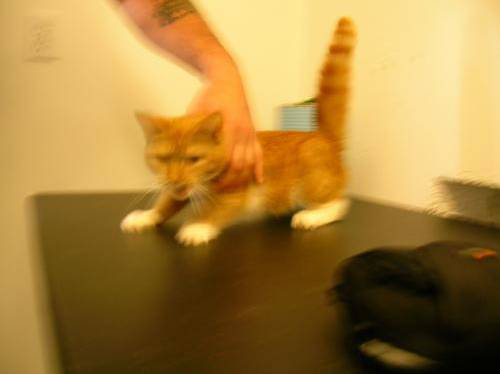

In [6]:
#Localizar o caminho da primeira imagem de gato na pasta treinamento
keras.preprocessing.image.load_img('caes-e-gatos/treinamento/gato/cat.0.jpg')

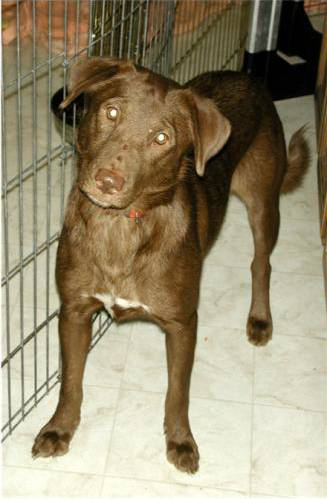

In [7]:
#Localizando o caminho da primeira imagem de cão na pasta treinamento
keras.preprocessing.image.load_img('caes-e-gatos/treinamento/cao/dog.1.jpg')

In [8]:
# Localizar as 4000 imagens, nas duas classes para a base de treinamento
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
dataset_treinamento = gerador_treinamento.flow_from_directory('caes-e-gatos/treinamento',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 4000 images belonging to 2 classes.


In [9]:
# Estabelecendo índices para as classes no treinamento 0: cão e 1: gato
dataset_treinamento.class_indices

{'cao': 0, 'gato': 1}

In [10]:
# Localizar o campinho para a paste de teste, contendo 1000 imagens com as duas classes
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('caes-e-gatos/teste',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1000 images belonging to 2 classes.


In [11]:
# Criando cada camada da rede neural, conforme o modelo sequencial da rede neural convolucional
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

C:\Users\Deyvis\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Visualizando o modelo com as classes criadas
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3137)           │    19,678,401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3137)           │     9,843,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         6,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Estabelecendo as taxas de perda e acurácia para o modelo
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# Treinando o modelo com 10 épocas de treinamento
# OBSERVAÇÃO: esta execução pode demorar conforme o desempenho de sua máquina
historico = network.fit(dataset_treinamento, epochs=10)

Epoch 1/10


C:\Users\Deyvis\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 213ms/step - accuracy: 0.5288 - loss: 0.8837
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 217ms/step - accuracy: 0.6289 - loss: 0.6602
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 211ms/step - accuracy: 0.6300 - loss: 0.6444
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 211ms/step - accuracy: 0.6712 - loss: 0.6071
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 211ms/step - accuracy: 0.6713 - loss: 0.5888
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 214ms/step - accuracy: 0.7093 - loss: 0.5598
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 212ms/step - accuracy: 0.7263 - loss: 0.5413
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 212ms/step - accuracy: 0.7312 - loss: 0.5175
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 212ms/step - accuracy: 0.7648 - loss: 0.4998
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 214ms/step - accuracy: 0.7628 - loss: 0.4849


In [15]:
# Estabelecendo índices para as classes no teste 0: cão e 1: gato
dataset_teste.class_indices

{'cao': 0, 'gato': 1}

In [16]:
# Trazendo ao modelo as predições do treinamento
previsoes = network.predict(dataset_teste)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


In [17]:
# Verificando a máxima previsão para as classes
previsoes = np.argmax(previsoes, axis = 1)

In [18]:
# Verificando os dados do modelo treinado
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
# Demonstrando a acurácia do modelo treinado
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.711

In [20]:
# Atribuindo as classes ao modelo treinado
dataset_teste.class_indices

{'cao': 0, 'gato': 1}

In [21]:
# Estabelecendo a matriz de confusão para confronto do dados entre as classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)

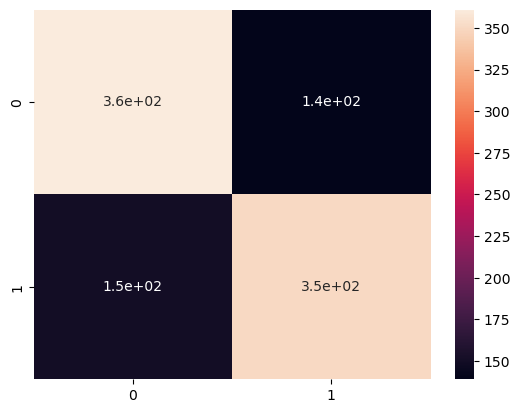

In [22]:
# Demonstrando a matriz de confusão
sns.heatmap(cm, annot=True);

In [23]:
# Classificando os dados obtidos
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       500
           1       0.72      0.70      0.71       500

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



In [24]:
# Gerando um arquivo .json com os dados do modelo
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [25]:
# Criando o arquivo de pesos (pesos.hdf5) do treinamento
from keras.models import save_model
network_saved = save_model(network, 'pesos.hdf5')

In [26]:
# Visualizando os dados salvos no arquivo .json
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializ

In [27]:
# Atribuindo o treinamento ao modelo
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('pesos.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [28]:
# Visualizando o modelo de rede neural
network_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3137)           │    19,678,401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3137)           │     9,843,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         6,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Na pasta teste, localize qualquer imagem para a classificação, conforme o modelo treinado
imagem = cv2.imread('caes-e-gatos/teste/gato/cat.3500.jpg')
window_name = 'image'
#imagem = cv2.imread('/content/caes-e-gatos/teste/cao/dog.3501.jpg')
cv2.imshow(window_name,imagem)

In [32]:
# Redimensionando a imagem em 64x64 pixels
imagem = cv2.resize(imagem, (64, 64))
cv2.imshow(window_name, imagem)

In [33]:
# Convertendo em escala de cinza
imagem = imagem / 255

In [34]:
# Parâmetros da imagem redimensionada
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape

(1, 64, 64, 3)

In [35]:
resultado = network_loaded(imagem)
resultado

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.5118847 , 0.48811528]], dtype=float32)>

In [36]:
# Demonstrando a classe que obteve o maior resultado
resultado = np.argmax(resultado)
resultado

0

In [37]:
# Verificando as classes do modelo
dataset_teste.class_indices

{'cao': 0, 'gato': 1}

In [38]:
# Categorizando o resultado
if resultado == 0:
  print('Cão')
else:
  print('Gato')

Cão


: 